In [12]:
import pandas as pd

In [9]:
df_cash_request = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
df_cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [4]:
df_fees = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [31]:
df_lexique = pd.read_excel('project_dataset/Lexique - Data Analyst.xlsx')
df_lexique.head()


,Column name,Description
0,id,Unique ID of the fee object
1,type,Type of fee\nPossible values are :\n\n- instan...
2,status,Status of the fees (= does the fees was succes...
3,category,Describe the reason of the incident fee.\n\n2 ...
4,reason,Description of the fee


# Análisis Gráfico Exploratorio para df_fees:
### Gráfico de Barras para Estado de Transacción:

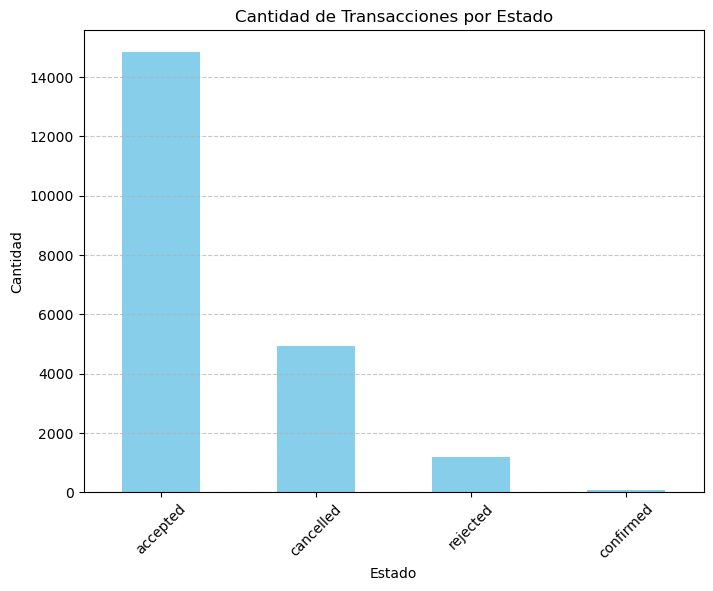

In [14]:
import matplotlib.pyplot as plt

# Contar la cantidad de transacciones en cada estado
estado_transaccion_counts = df_fees['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
estado_transaccion_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Transacciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Gráfico de Líneas para la Frecuencia de Transacciones por Fecha:

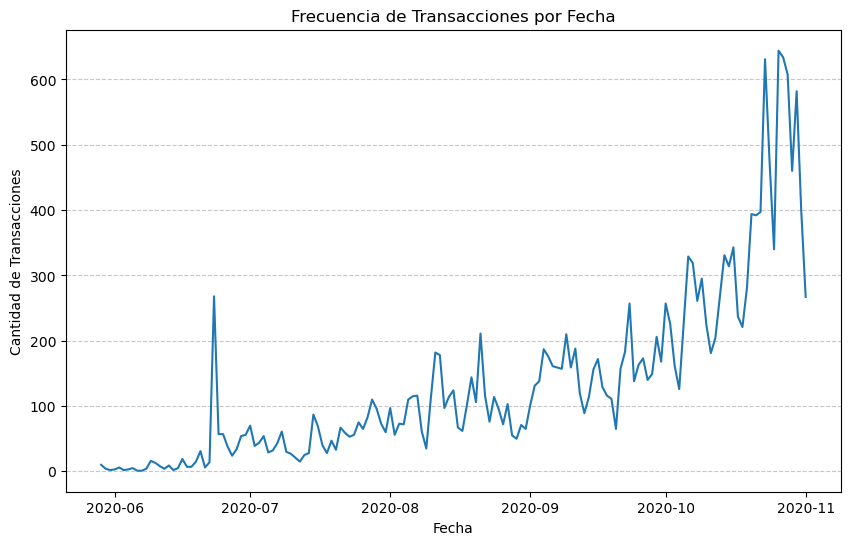

In [15]:
# Convertir las fechas a tipo datetime
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'])

# Agrupar por fecha y contar la cantidad de transacciones
transacciones_por_fecha = df_fees.groupby(df_fees['created_at'].dt.date).size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
transacciones_por_fecha.plot()
plt.title('Frecuencia de Transacciones por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Transacciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Gráfico de pastel de Categorías de Transacciones:

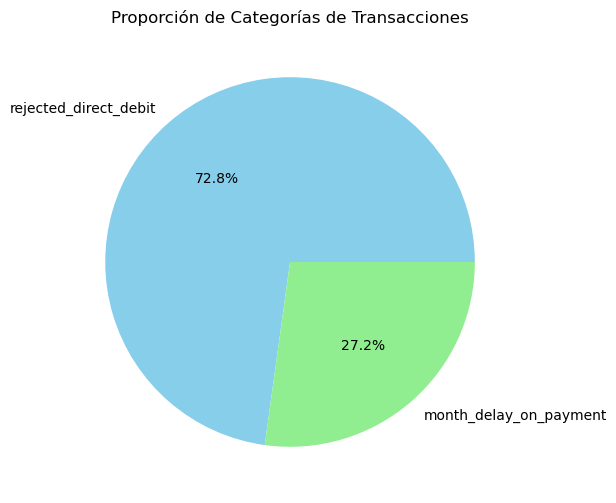

In [24]:
# Contar la cantidad de transacciones en cada categoría
categoria_transaccion_counts = df_fees['category'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
categoria_transaccion_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('Proporción de Categorías de Transacciones')
plt.ylabel('')
plt.show()

# Análisis Gráfico Exploratorio para df_cash_request:

### Gráfico de Barras para el Estado de las Solicitudes:

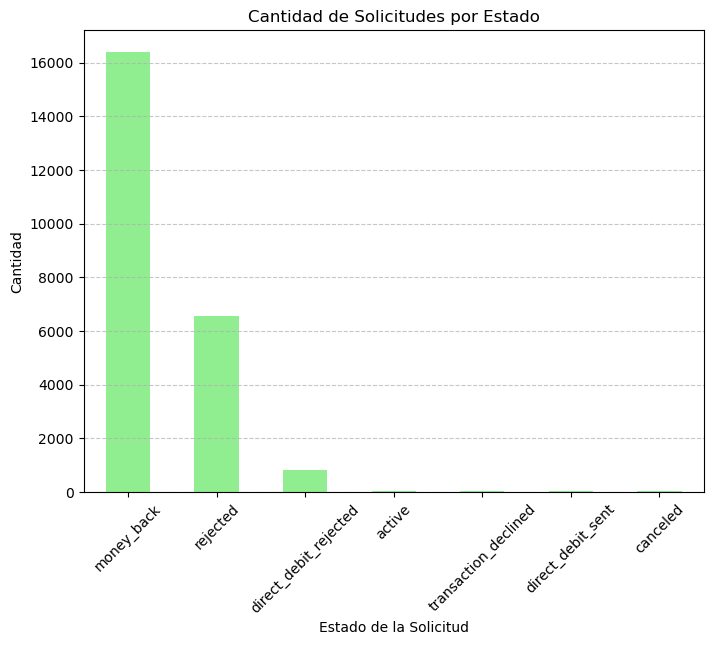

In [42]:
# Contar la cantidad de solicitudes en cada estado
estado_solicitud_counts = df_cash_request['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
estado_solicitud_counts.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Solicitudes por Estado')
plt.xlabel('Estado de la Solicitud')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Gráfico de Líneas para la Frecuencia de Solicitudes por Mes:

/tmp/ipykernel_8474/4051944478.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  solicitudes_por_mes = df_cash_request.groupby(df_cash_request['created_at'].dt.to_period('M')).size()


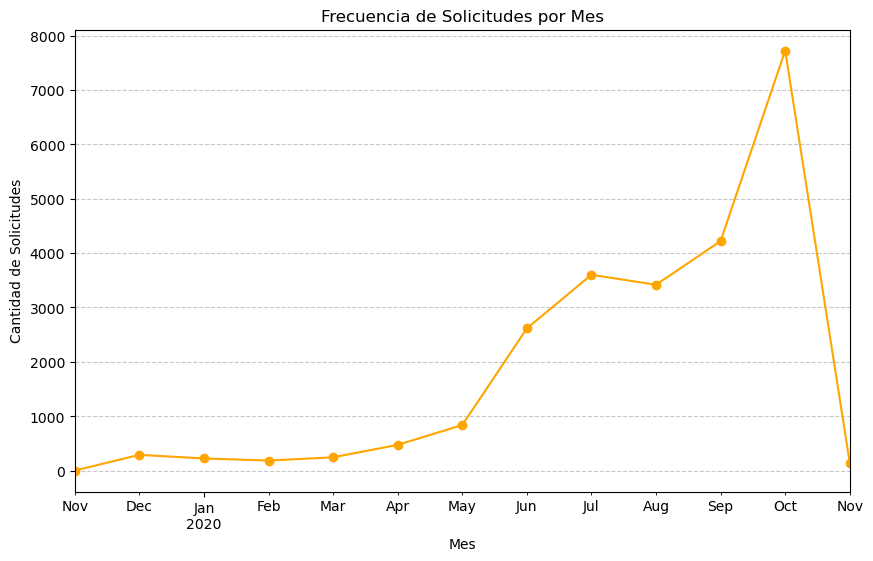

In [43]:
# Convertir las fechas a tipo datetime
df_cash_request['created_at'] = pd.to_datetime(df_cash_request['created_at'])

# Agrupar por mes y contar la cantidad de solicitudes
solicitudes_por_mes = df_cash_request.groupby(df_cash_request['created_at'].dt.to_period('M')).size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
solicitudes_por_mes.plot(marker='o', color='orange')
plt.title('Frecuencia de Solicitudes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Solicitudes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Análisis gráfico de relación entre ambos dataframes

### Gráfico de Barras para Comparar el Estado de las Transacciones y el Estado de las Solicitudes:


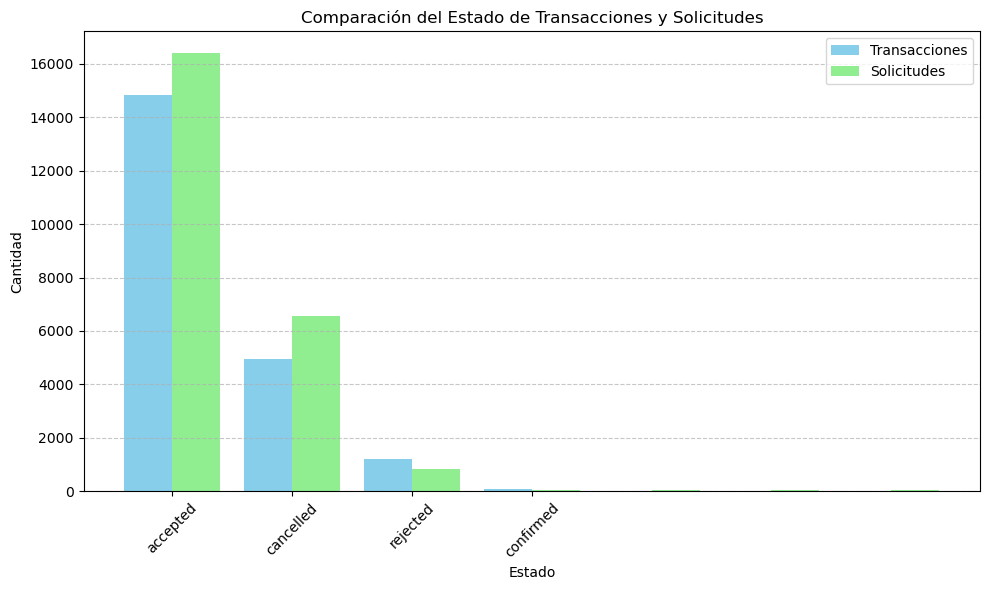

In [48]:
import numpy as np

# Contar la cantidad de transacciones en cada estado
estado_transaccion_counts = df_fees['status'].value_counts()

# Contar la cantidad de solicitudes en cada estado
estado_solicitud_counts = df_cash_request['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico para el DataFrame df_fees
plt.bar(np.arange(len(estado_transaccion_counts)) - 0.2, estado_transaccion_counts.values, width=0.4, color='skyblue', label='Transacciones')

# Gráfico para el DataFrame df_cash_request
plt.bar(np.arange(len(estado_solicitud_counts)) + 0.2, estado_solicitud_counts.values, width=0.4, color='lightgreen', label='Solicitudes')

plt.title('Comparación del Estado de Transacciones y Solicitudes')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(np.arange(len(estado_transaccion_counts)), estado_transaccion_counts.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Gráfico de Líneas para Comparar la Frecuencia de Transacciones y Solicitudes por Mes:

/tmp/ipykernel_8474/2497079474.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transacciones_por_mes = df_fees.groupby(df_fees['created_at'].dt.to_period('M')).size()
/tmp/ipykernel_8474/2497079474.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  solicitudes_por_mes = df_cash_request.groupby(df_cash_request['created_at'].dt.to_period('M')).size()
/tmp/ipykernel_8474/2497079474.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_completas = pd.date_range(start=min(df_fees['created_at'].min(), df_cash_request['created_at'].min()),
/tmp/ipykernel_8474/2497079474.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transacciones_por_mes = transacciones_por_mes.reindex(fechas_completas.to_period('M'), fill_value=0)
/tmp/ipykernel_8474/2497079474.py:16: UserWarning: Converting to P

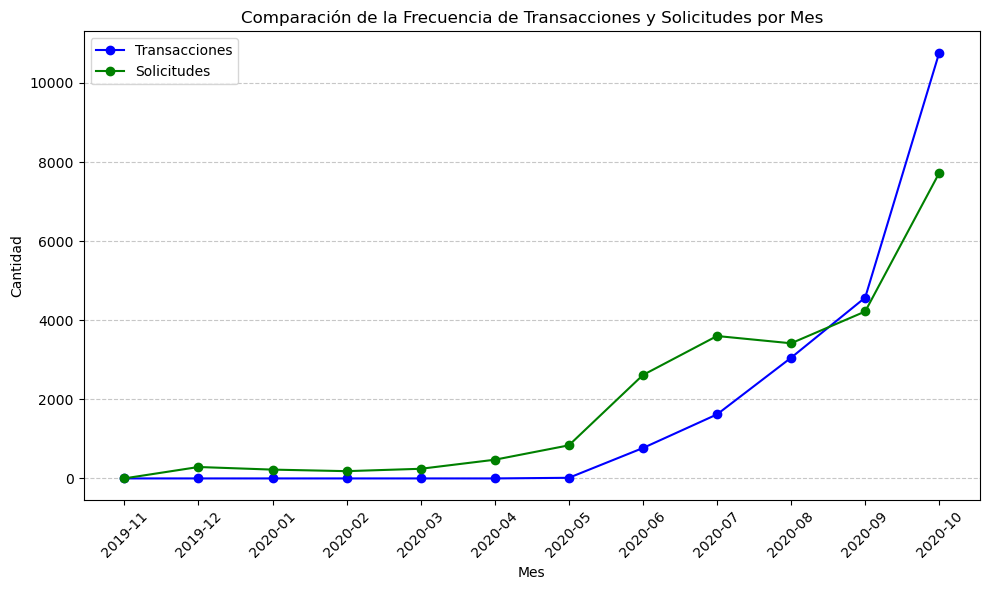

In [58]:
# Convertir las fechas a tipo datetime
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'])
df_cash_request['created_at'] = pd.to_datetime(df_cash_request['created_at'])

# Agrupar por mes y contar la cantidad de transacciones y solicitudes
transacciones_por_mes = df_fees.groupby(df_fees['created_at'].dt.to_period('M')).size()
solicitudes_por_mes = df_cash_request.groupby(df_cash_request['created_at'].dt.to_period('M')).size()

# Crear un rango de fechas que incluya todas las fechas de ambos DataFrames
fechas_completas = pd.date_range(start=min(df_fees['created_at'].min(), df_cash_request['created_at'].min()),
                                 end=max(df_fees['created_at'].max(), df_cash_request['created_at'].max()),
                                 freq='M')

# Reindexar las series para incluir todas las fechas
transacciones_por_mes = transacciones_por_mes.reindex(fechas_completas.to_period('M'), fill_value=0)
solicitudes_por_mes = solicitudes_por_mes.reindex(fechas_completas.to_period('M'), fill_value=0)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Enumerar los meses y años para los ejes x
x_values = np.arange(len(transacciones_por_mes))

# Línea para las transacciones
plt.plot(x_values, transacciones_por_mes.values, marker='o', color='blue', label='Transacciones')

# Línea para las solicitudes
plt.plot(x_values, solicitudes_por_mes.values, marker='o', color='green', label='Solicitudes')

# Etiquetas de los ejes x
plt.xticks(x_values, fechas_completas.strftime('%Y-%m'), rotation=45)

plt.title('Comparación de la Frecuencia de Transacciones y Solicitudes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
